## **Importing kaggle dataset**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 263MB/s]
100% 1.06G/1.06G [00:04<00:00, 236MB/s]


## **Un-zipping the data zip file**

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## We will get train and test data from the zip file

## **importing packages**

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, BatchNormalization, Dropout

## **Extracting the train and test data for model training**

In [8]:
## Using 'generators' in keras, we can divide the data into batches so that usage of RAM and time will be less

## we will use - 'image__dataset_from_directory' from keras -> see keras documentation for more info (keras-'image_dataset_from_directory')

train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode= 'int', # will convert cat = 0, dog = 1
    batch_size= 32,
    image_size = (256, 256), # will make the same size for each image
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode= 'int', # will convert cat = 0, dog = 1
    batch_size= 32,
    image_size = (256, 256), # will make the same size for each image
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Image are now in the size from 0 to 256. We have to 'Normalize' that. And have to make the size between 0 to 1

In [9]:
def process(image, label):
  # dividing the images with 255 and converting into float values btween 0 to 1
  image = tf.cast(image/255, tf.float32)
  return image, label

# one by one each image will get processed
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## **Create CNN model**

In [29]:
model = keras.Sequential()

## convolution and Max-pooling layers
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', input_shape = (256,256,3), activation = 'relu'))
model.add(BatchNormalization()) #----------> to reduce overfitting
model.add(MaxPooling2D(strides = 2, pool_size = (2,2), padding = 'valid'))


model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization()) #-----------> to reduce overfitting
model.add(MaxPooling2D(padding = 'valid', strides = 2, pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(BatchNormalization())  #----------> to reduce overfitting
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

## Flattening the CNN layers
model.add(Flatten())

## Adding Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))  #----------> to reduce overfitting
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.20))  #----------> to reduce overfitting
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_3 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [31]:
## Compiling the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
## Fitting the model
history = model.fit(train_ds, epochs=10, validation_data = validation_ds, )

Epoch 1/10
625/625 [==============================] - 75s 112ms/step - loss: 1.5940 - accuracy: 0.5562 - val_loss: 0.6408 - val_accuracy: 0.6512
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6176 - accuracy: 0.6691 - val_loss: 0.6007 - val_accuracy: 0.6666
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5416 - accuracy: 0.7303 - val_loss: 0.5821 - val_accuracy: 0.6672
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4845 - accuracy: 0.7701 - val_loss: 0.4907 - val_accuracy: 0.7664
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4278 - accuracy: 0.8029 - val_loss: 0.4705 - val_accuracy: 0.7722
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3731 - accuracy: 0.8369 - val_loss: 0.4334 - val_accuracy: 0.7926
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3174 - accuracy: 0.8615 - val_loss: 0.4558 - val_ac

## Graphical representation

In [33]:
import matplotlib.pyplot as plt

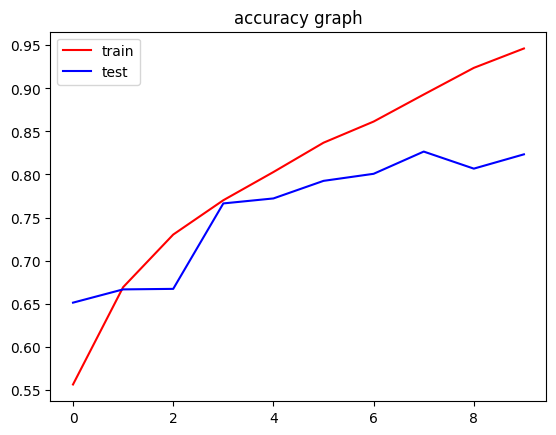

In [34]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.title('accuracy graph')
plt.legend()
plt.show()

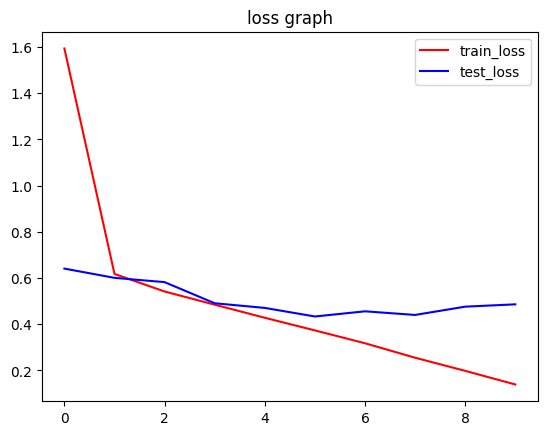

In [35]:
plt.plot(history.history['loss'], color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test_loss')
plt.title("loss graph")
plt.legend()
plt.show()

## **Model Prediction**

In [41]:
## Importing open cv
import cv2

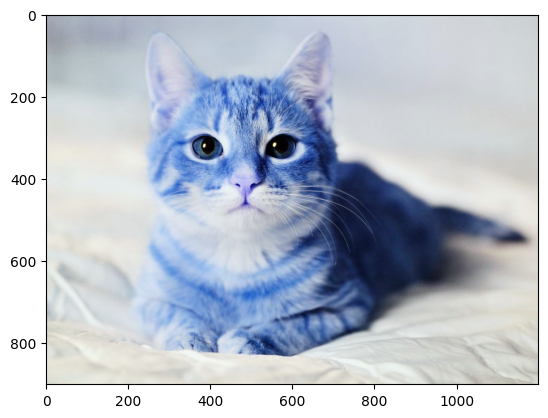

In [42]:
## reading test image
test_image = cv2.imread('/content/cat.jpg')
plt.imshow(test_image)

In [43]:
test_image.shape

(901, 1200, 3)

In [44]:
## resizing the image
test_image = cv2.resize(test_image, (256,256))

## reshaping the image(as images gows batch by batch so making 1 batch as we have one image only)
test_input = test_image.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 433ms/step


array([[1.]], dtype=float32)

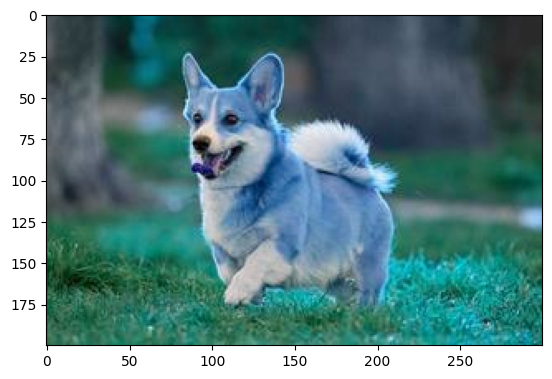

In [48]:
test_image2 = cv2.imread('/content/dog.jpg')
plt.imshow(test_image2)

In [49]:
test_image2.shape

(200, 300, 3)

In [50]:
test_image2 = cv2.resize(test_image2, (256,256))
test_input2 = test_image2.reshape((1,256,256,3))

In [51]:
model.predict(test_input2)

1/1 [==============================] - 0s 79ms/step


array([[0.]], dtype=float32)

## cat - 1, dog - 0 ---> output